In [1]:
import numpy as np         
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import *
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import h5py
import numpy.linalg as la
from matplotlib import rcParams
from scipy.stats import norm
import os
import subprocess
import shlex
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from random import randint
from tqdm import tqdm


params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
mpl.rcParams.update(params)
plt.jet()

In [2]:
filename = '../bskeleton_data/mock_TNG300-1_Cr6_lth0.1_sm1.hdf5'
f = h5py.File(filename, 'r')
headers = list(f.keys())
print(headers)
env = np.array(f['environment']) #3 void, 2 sheet, 1 filament, 0 peak
pos = np.array(f['pos'])
f.close()

filename = '../bskeleton_data/WEB_CIC_256_DM_TNG300-2.hdf5'
f = h5py.File(filename, 'r')
headers = list(f.keys())
print(headers)
density = f['density_smooth'][:,:,:]
f.close()

filename = '../bskeleton_data/Bsk_TNG_b1.0_n_Cr6.h5'
f = h5py.File(filename, 'r')
print(f.keys())
ID = f['ID'][...]
x = f['coor'][0][...]
y = f['coor'][1][...]
z = f['coor'][2][...]
con = f['con'][...]
f.close()

['density', 'environment', 'mass', 'metal', 'pos', 'r_abs']
['density_smooth', 'eigenvector1', 'eigenvector2', 'eigenvector3', 'hessian', 'lambda1', 'lambda2', 'lambda3', 'potential']
<KeysViewHDF5 ['Dabc', 'Dad', 'Dden', 'Dfa', 'Dms', 'Dmt', 'Dnc', 'Dra', 'Dsp', 'ID', 'abc', 'ad', 'con', 'coor', 'den', 'fa', 'ms', 'mt', 'nc', 'ra', 'sp', 'vol']>


In [3]:
print(density.shape)
print(pos.shape)

(256, 256, 256)
(1675074, 3)


## Density Field

In [4]:
length = 300 #Mpc
z_lim = 40000 #In the scale of the Simulated box 205000.0
z_lim_256 = int(interp(40000,[0,200000],[0,256]))


rr = 512
xx = np.linspace(0,length,rr)
yy = np.linspace(0,length,rr)
slice_id = 0

data = []
for i in range(0,256):
    for j in range(0,256):
        for k in range(0,z_lim_256):
            den = np.log10(density[i,j,k]+1) #+1 to normalice on log scale
            data.append((i,j,den))

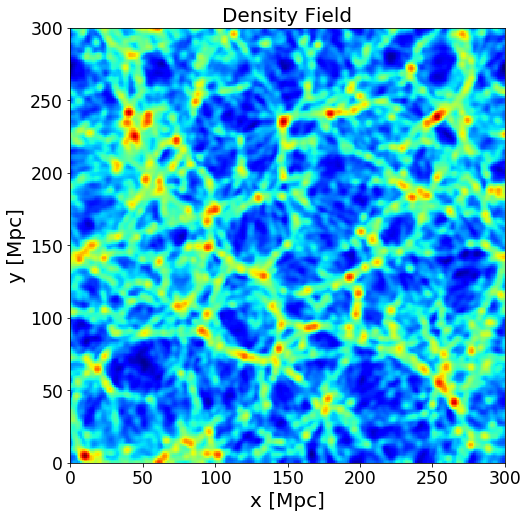

In [5]:
data = np.array(data)          
dens = data[:,2].reshape(256,256,z_lim_256)

fig = plt.figure(figsize = (8,8))
for i in range(z_lim_256):
    plt.title("Density Field",size = 20)
    plt.imshow(dens[:,:,i], origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"))
    plt.xlabel("x [Mpc]",size = 20)
    plt.ylabel("y [Mpc]",size = 20)
#     plt.savefig("/home/toshiba/Desktop/F"+str(i)+".png")
    
# files_png = "/home/toshiba/Downloads/Density/%d.png"
# name_avi = "/home/toshiba/Downloads/Density/animationgrid.avi"
# # !gifsicle --delay=1 --loop $files_gif > name_gif
# !ffmpeg -i $files_png -vcodec mpeg4 "-filter:v" "setpts=2*PTS" $name_avi    

In [ ]:
params = {'legend.fontsize': 30,
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize': 30,
         'ytick.labelsize':30}
mpl.rcParams.update(params)
plt.jet()

zin = 10000
zlim = 39000 # Limit on z axis to compute the beta-skeleton
maskzm = z < (zlim + zin)
maskzM = z > (zlim - zin)
IDzm = ID[maskzm & maskzM]
tt = length/200000
#200000 size of the box simulated



###############################################

fig = plt.figure(figsize = (21,10))
plt.subplot(1,2,1)
plt.title("Density Field",size=30)
plt.imshow(dens[:,:,z_lim_256-1].T, origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"))
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

ax2=fig.add_subplot(1,2,2)
plt.title(r'$\beta$-Skeleton',size=30)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yaxis(), visible=False)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)
plt.imshow(dens[:,:,z_lim_256-1].T, origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"),alpha=0.5)
for k in IDzm:
    for j in con[k]:
        plt.plot([x[k]*tt,x[j]*tt],[y[k]*tt,y[j]*tt],'bo-',markersize=2, c="r")

fig.tight_layout()
plt.savefig("./Figures/Density_BSK"+str(zlim)+".pdf",  transparent=True,rasterized=True)
plt.savefig("./Figures/Density_BSK"+str(zlim)+".png",  transparent=True)
plt.show()


fig = plt.figure(figsize = (21,10))
plt.subplot(1,2,1)
plt.title("Density Field",size=30)
plt.imshow(dens[:,:,z_lim_256-1].T, origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"))
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

ax2=fig.add_subplot(1,2,2)
plt.title(r'$\beta$-Skeleton',size=30)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yaxis(), visible=False)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)
plt.imshow(dens[:,:,z_lim_256-1].T, origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"),alpha=0)
for k in IDzm:
    for j in con[k]:
        plt.plot([x[k]*tt,x[j]*tt],[y[k]*tt,y[j]*tt],'bo-',markersize=2, c="r")

fig.tight_layout()
plt.savefig("./Figures/Density_BSK"+str(zlim)+"_.pdf",  transparent=True, rasterized=True)
plt.savefig("./Figures/Density_BSK"+str(zlim)+"_.png",  transparent=True, rasterized=True)
plt.show()

<Figure size 432x288 with 0 Axes>

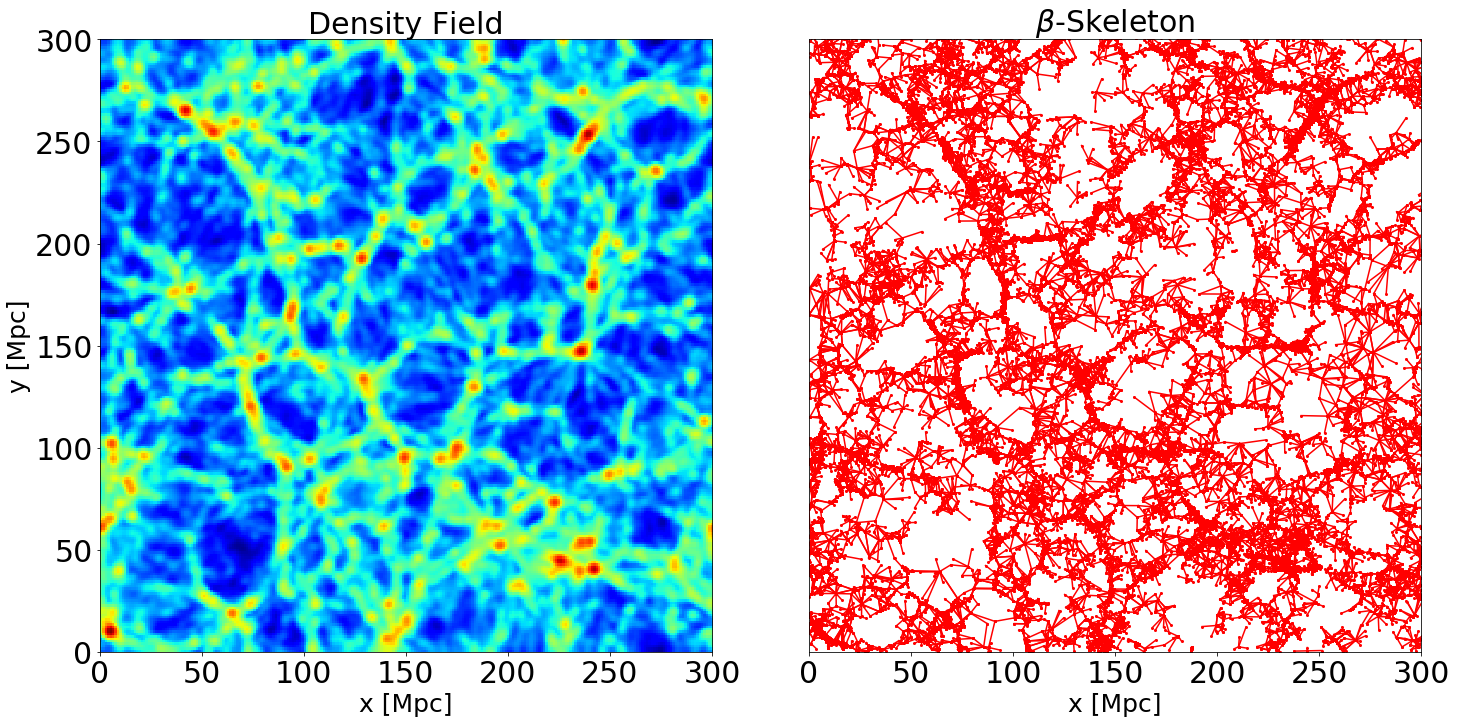

In [6]:
params = {'legend.fontsize': 30,
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize': 30,
         'ytick.labelsize':30}
mpl.rcParams.update(params)
plt.jet()

zin = 1000
zlim = 39000 # Limit on z axis to compute the beta-skeleton
maskzm = z < (zlim + zin)
maskzM = z > (zlim - zin)
IDzm = ID[maskzm & maskzM]
tt = length/200000
#200000 size of the box simulated

fig = plt.figure(figsize = (21,10))
plt.subplot(1,2,1)
plt.title("Density Field",size=30)
plt.imshow(dens[:,:,z_lim_256-1].T, origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"))
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

ax2=fig.add_subplot(1,2,2)
plt.title(r'$\beta$-Skeleton',size=30)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yaxis(), visible=False)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)
plt.imshow(dens[:,:,z_lim_256-1].T, origin = 'lower',extent = [xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"),alpha=0)
for k in IDzm:
    for j in con[k]:
        plt.plot([x[k]*tt,x[j]*tt],[y[k]*tt,y[j]*tt],'bo-',markersize=2, c="r")

fig.tight_layout()
plt.savefig("./Figures/Fig1_.pdf",  transparent=True, rasterized=True,bbox_inches='tight')
plt.savefig("./Figures/Fig1_.png",  transparent=True, rasterized=True,bbox_inches='tight')
plt.show()

In [8]:
# files_png = "./Figures/BSK_Animated/%d.png"
# name_avi = "./Figures/animationgrid.avi"
# # !gifsicle --delay=1 --loop $files_gif > name_gif
# !ffmpeg -i $files_png -vcodec mpeg4 "-filter:v" "setpts=0.2*PTS" $name_avi

In [9]:
print(np.array(env).shape)
print(pos.T[0].shape)
print((pos.T[2]<zlim).shape)
print(min(pos.T[2]))
print(max(pos.T[2]))
print([False,True] and [True,True])

(1675074,)
(1675074,)
(1675074,)
0.12914845
204999.89
[True, True]


<Figure size 432x288 with 0 Axes>

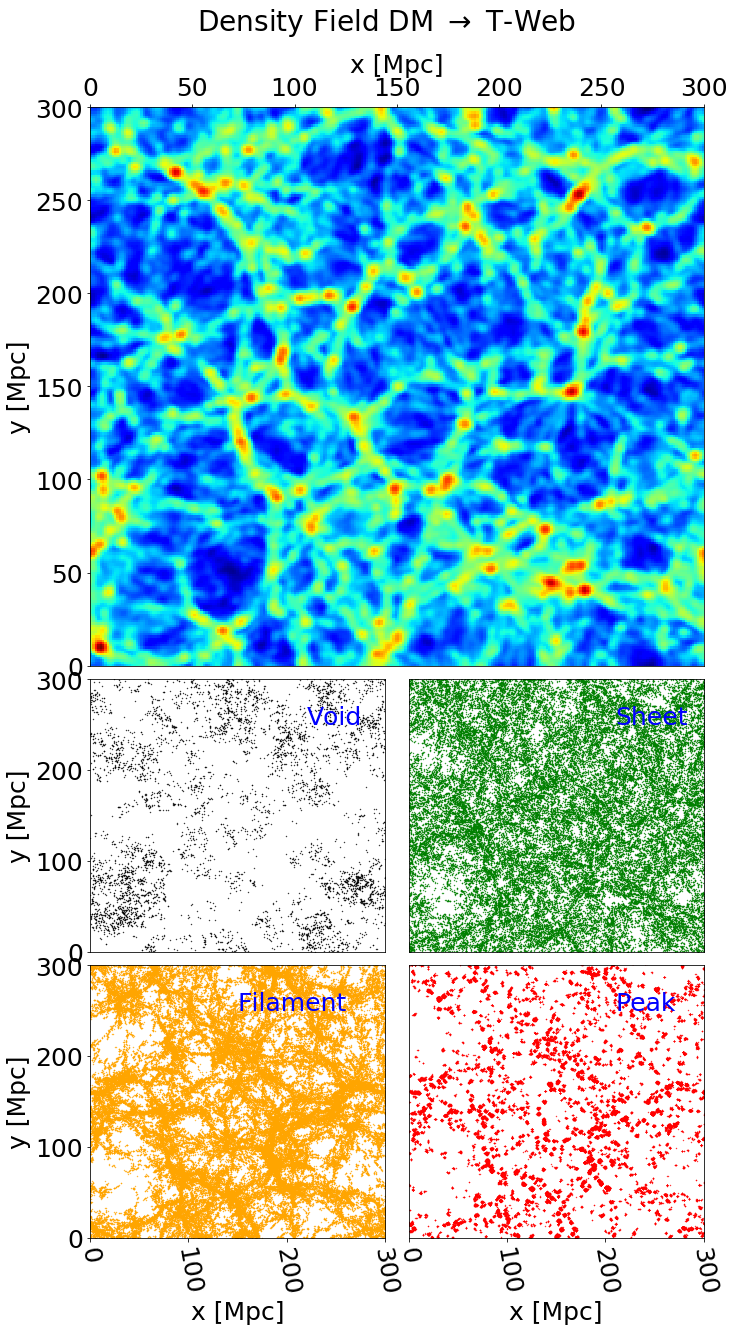

In [10]:
params = {'legend.fontsize': 30,
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize': 25,
         'ytick.labelsize': 25}
mpl.rcParams.update(params)
plt.jet()

sd = 0.15
fig = plt.figure(figsize = (11,20))
grid = plt.GridSpec(4,2)  # rows,cols
grid.update(wspace=0.08,hspace=0.05)
plt.suptitle(r'Density Field DM $\rightarrow$ T-Web', size=28)
fig.subplots_adjust(top=0.91)

ax=fig.add_subplot(grid[0:2,0:2])
ax.get_xaxis().set_ticks_position('top')
ax.get_xaxis().set_label_position('top')
plt.imshow(dens[:,:,z_lim_256-1].T,origin='lower',extent=[xx.min(),xx.max(),yy.min(),yy.max()],cmap=plt.get_cmap("jet"), aspect="auto")
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_zlim=pos.T[0][pos.T[2]<zlim]
yy_zlim=pos.T[1][pos.T[2]<zlim]
env_zlim=env[pos.T[2]<zlim]

xx_void=xx_zlim[env_zlim==3]*tt
yy_void=yy_zlim[env_zlim==3]*tt
ax1=fig.add_subplot(grid[2:3,0:1])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_xaxis(), visible=False)
plt.text(220,250,"Void",fontsize=25,c="Blue")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.scatter(xx_void,yy_void,c="black",s=sd)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_sheet=xx_zlim[env_zlim==2]*tt
yy_sheet=yy_zlim[env_zlim==2]*tt
ax2=fig.add_subplot(grid[2:3,1:2], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yaxis(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_xaxis(), visible=False)
plt.text(210,250,"Sheet",fontsize=25,c="Blue")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.scatter(xx_sheet,yy_sheet,c="green",s=sd)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_filament=xx_zlim[env_zlim==1]*tt
yy_filament=yy_zlim[env_zlim==1]*tt
ax3=fig.add_subplot(grid[3:4,0:1],sharex=ax1)
plt.text(150,250,"Filament",fontsize=25,c="Blue")
plt.xticks(rotation=-80)
plt.yticks(rotation=0)
plt.scatter(xx_filament,yy_filament,c="orange",s=sd)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_peak=xx_zlim[env_zlim==0]*tt
yy_peak=yy_zlim[env_zlim==0]*tt
ax4=fig.add_subplot(grid[3:4,1:2])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_yaxis(), visible=False)
plt.text(210,250,"Peak",fontsize=25,c="Blue")
plt.xticks(rotation=-80)
plt.scatter(xx_peak,yy_peak,c="red",s=sd)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

# plt.savefig("./Figures/Density_Envi_BSK"+str(zlim)+".pdf", transparent=True)
plt.savefig("./Figures/Density_Envi_BSK"+str(zlim)+".svg",  transparent=True)
plt.savefig("./Figures/Density_Envi_BSK"+str(zlim)+".png",  transparent=True)
plt.show()

In [11]:
params = {'legend.fontsize': 30,
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'xtick.labelsize': 25,
         'ytick.labelsize': 25}
mpl.rcParams.update(params)
plt.jet()

fig = plt.figure(figsize = (21,10))
fig.subplots_adjust(top=0.91)
grid = plt.GridSpec(2,4)  # rows,cols
grid.update(wspace=0.08,hspace=0.05)

ax=fig.add_subplot(grid[0:2,2:4])
# for k in IDzm:
#     for j in con[k]:
#         plt.plot([x[k]*tt,x[j]*tt],[y[k]*tt,y[j]*tt],'bo-',markersize=2, c="r")
plt.grid()
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
ax.get_yaxis().set_ticks_position('right')
ax.get_yaxis().set_label_position('right')
ax.get_yaxis().tick_right()
plt.suptitle(r'T-Web Environments $\rightarrow$ $\beta$-Skeleton', size=30)
plt.xlim(0,300)
plt.ylim(0,300)

xx_zlim=pos.T[0][pos.T[2]<zlim]
yy_zlim=pos.T[1][pos.T[2]<zlim]
env_zlim=env[pos.T[2]<zlim]

xx_void=xx_zlim[env_zlim==3]*tt
yy_void=yy_zlim[env_zlim==3]*tt
ax1=fig.add_subplot(grid[0:1,0:1])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_xaxis(), visible=False)
# plt.setp(ax1.get_yticklabels(), visible=False)
# plt.setp(ax1.get_yaxis(), visible=False)
plt.text(220,250,"Void",fontsize=25,c="Blue")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.scatter(xx_void,yy_void,c="black",s=0.15)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_sheet=xx_zlim[env_zlim==2]*tt
yy_sheet=yy_zlim[env_zlim==2]*tt
ax2=fig.add_subplot(grid[1:2,1:2], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yaxis(), visible=False)
plt.text(210,250,"Sheet",fontsize=25,c="Blue")
plt.xticks(rotation=-45)
plt.scatter(xx_sheet,yy_sheet,c="green",s=0.15)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_filament=xx_zlim[env_zlim==1]*tt
yy_filament=yy_zlim[env_zlim==1]*tt
ax3=fig.add_subplot(grid[0:1,1:2])
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_yaxis(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_xaxis(), visible=False)
plt.text(150,250,"Filament",fontsize=25,c="Blue")
plt.xticks(rotation=-80)
plt.yticks(rotation=0)
plt.scatter(xx_filament,yy_filament,c="orange",s=0.15)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

xx_peak=xx_zlim[env_zlim==0]*tt
yy_peak=yy_zlim[env_zlim==0]*tt
ax4=fig.add_subplot(grid[1:2,0:1])
ax4.get_yaxis().set_ticks_position('left')
ax4.get_yaxis().set_label_position('left')
ax4.get_yaxis().tick_left()
plt.text(210,250,"Peak",fontsize=25,c="Blue")
plt.xticks(rotation=-45)
plt.scatter(xx_peak,yy_peak,c="red",s=0.15)
plt.xlabel("x [Mpc]",size=25)
plt.ylabel("y [Mpc]",size=25)
plt.xlim(0,300)
plt.ylim(0,300)

plt.savefig("./Figures/TWebenv_BSK"+str(zlim)+".svg",  transparent=True)
plt.savefig("./Figures/TWebenv_BSK"+str(zlim)+".png",  transparent=True)
plt.show()

IndentationError: expected an indented block (<ipython-input-11-dce86bb322d2>, line 18)